# Data Analysis
Function for making a dataframe from a processed JSON:

In [7]:
def generate_word_char_aggregates(filepath, data_type):
    import json
    import pandas as pd
    from collections import Counter
    
    container = []
    
    for line in open(filepath, "r"):
        post = json.loads(line)
        container.append([post["post_id"], post["author_id"], len(post[data_type])])
    
    return pd.DataFrame(container, columns=["post_id", "author_id", data_type])

JSON paths:

In [4]:
test_words_path = "jsons/test_unigram_words.json"
test_chars_path = "jsons/test_unigram_chars.json"
train_words_path = "jsons/train_unigram_words.json"
train_chars_path = "jsons/train_unigram_chars.json"

Create aggregate data frames:

In [10]:
test_words_df = generate_word_char_aggregates(test_words_path, "unigram_words")
test_chars_df = generate_word_char_aggregates(test_chars_path, "unigram_chars")
test_aggregates = test_words_df.merge(test_chars_df, on=["post_id", "author_id"])

In [13]:
train_words_df = generate_word_char_aggregates(train_words_path, "unigram_words")
train_chars_df = generate_word_char_aggregates(train_chars_path, "unigram_chars")
train_aggregates = train_words_df.merge(train_chars_df, on=["post_id", "author_id"])

Plot word/char counts per post (switch out dataset/labels manually):

Text(0.5, 0, 'Character Count')

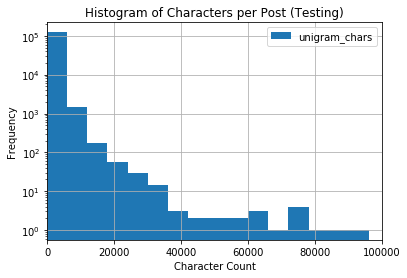

In [86]:
test_aggregates.plot(kind="hist", y="unigram_chars", bins=50, logy=True, 
                     title="Histogram of Characters per Post (Testing)",
                     grid=True, xlim=(0,100000)).set_xlabel("Character Count")

Plot post counts per author (switch out dataset/labels manually):

Text(0.5, 0, 'Post Count')

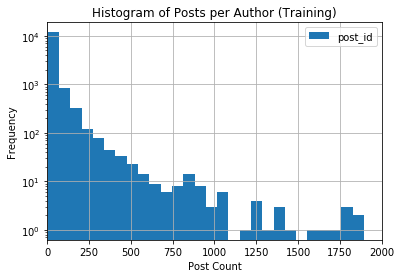

In [102]:
train_aggregates.groupby("author_id").count().plot(kind="hist", y="post_id", bins=50, logy=True, 
                                                  title="Histogram of Posts per Author (Training)",
                                                  grid=True,
                                                  xlim=(0,2000)).set_xlabel("Post Count")

Plot word/char counts per author (switch out dataset/labels manually):

Text(0.5, 0, 'Character Count')

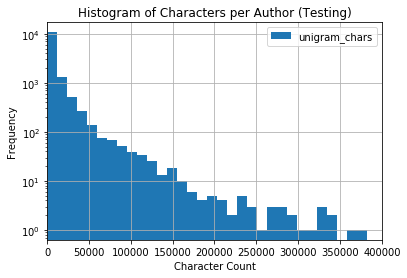

In [124]:
test_aggregates.groupby("author_id").sum().plot(kind="hist", y="unigram_chars", bins=50, logy=True, 
                                                title="Histogram of Characters per Author (Testing)",
                                                grid=True, xlim=(0,400000)).set_xlabel("Character Count")